<a href="https://colab.research.google.com/github/islamhanii/Panorama-Stitching-Alignment-/blob/main/CV_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# error OpenCV(4.1.2): solution in pip commented below(Run those commands for one time) then restart runtime

#!pip uninstall opencv-python
#!pip install -i http://pypi.douban.com/simple --trusted-host pypi.douban.com opencv-contrib-python==3.4.2.17

from google.colab import files
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
# upload files function
def upload_files():
  #function to upload files on colab
  uploaded = files.upload()
  #loop on the uploded file and store them in binary values
  for label, image in uploaded.items():
    open(label, 'wb').write(image)
  
  # return images paths
  return list(uploaded.keys())

# match images function
def match_images(image1, image2):
  # create SIFT object
  sift = cv.xfeatures2d.SIFT_create()
  # detect SIFT features in both images without mask(None)
  # descriptor is used for matching keypoints across images using 16x16 neighboor values to the key point(16 sub-blocks * 8 bins per block)
  keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
  keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)

  # create feature matcher - compute distance by NORM_L1 - crossCheck=True => to return accurate values
  # Norm L1 is the taxicab (or manhattan) distance (sum of absolute values)
  bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
  # match descriptors of both images
  matches = bf.match(descriptors_1,descriptors_2)

  # sort matches by distance
  matches = sorted(matches, key=lambda x:x.distance)
  # draw first 50 matches with no filter masks
  matched_img = cv.drawMatches(image1, keypoints_1, image2, keypoints_2, matches[:50], None, flags=2)

  return matched_img

# crop image border function
def crop_border(image):
  #get image dimentions
  image = np.array(image)
  rows, cols, n = image.shape
  top, down, left, right = (0, 0, 0, 0)

  # get start point from top
  for i in range(0, rows-1):
    count = 0
    for j in range(0, cols-1):
      if(np.count_nonzero(image[i][j])==0):
        count += 1
    if(count < cols/8):
      top = i
      break
  
  # get start point from down
  for i in range(rows-1, 0, -1):
    count = 0
    for j in range(0, cols-1):
      if(np.count_nonzero(image[i][j])==0):
        count += 1
    if(count < cols/8):
      down = i
      break
  
  # get start point from left
  for j in range(0, cols-1):
    count = 0
    for i in range(0, rows-1):
      if(np.count_nonzero(image[i][j])==0):
        count += 1
    if(count < rows/8):
      left = j
      break

  # get start point from right
  for j in range(cols-1, 0, -1):
    count = 0
    for i in range(0, rows-1):
      if(np.count_nonzero(image[i][j])==0):
        count += 1
    if(count < rows/8):
      right = j
      break
  
  return (top, down, left, right)

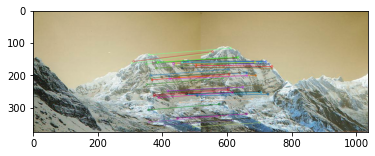

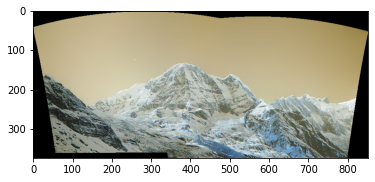

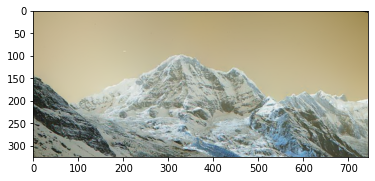

In [ ]:
#paths = upload_files()

# read images
image1 = cv.imread(paths[0])
image2 = cv.imread(paths[1])

# call function to match images
matched_img = match_images(image1, image2)
# display the image with the matched points
plt.figure()
plt.imshow(matched_img)

# put images in array to stitch them
images = []
images.append(image1)
images.append(image2)
# create stitcher object
stitcher = cv.createStitcher()
#stitch the images
(status, stitched) = stitcher.stitch(images)
# display stitched image before cropping
plt.figure()
plt.imshow(stitched)

# get crop border values
top, down, left, right = crop_border(stitched)
# crop the stitched image
panorama = stitched[top:down, left:right, :]
# show panorama photo
plt.figure()
plt.imshow(panorama)
